In [44]:
from scipy.stats import t,norm
import matplotlib.pyplot as plt
import numpy as np

# Hypothesis Testing

Step - 1:  
* Alternate Hypothesis: $ H_1 \ \Rightarrow \ >, \ <, \ \neq  $  
* Null Hypothesis: $ H_0 \ \Rightarrow \ \leq, \ \geq, \ = $

Step - 2:  
* Collect a sample of size n
* Compute the mean from this sample $ \bar{x} $

Step - 3:
Compute Test Statistic:  
* If population variance is known $$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

* If population variance is unknown $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

Step - 4:
Decide significance level $ \alpha $. Lower $ \alpha $ means you need stronger evidence to reject Null Hypothesis.

Step - 5.1: Apply decision rule:
* If test statistic is z-score -
    * Two tailed z-test: $$ |z| > z_\frac{\alpha}{2} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0$$
    * Right tailed z-test: $$ z > z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Left tailed z-test: $$ z < -z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    
* If test statistic is t-score
    * Two tailed t-test: $$ |t| > t_{n-1,\frac{\alpha}{2}} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Right tailed t-test: $$ t > t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Left tailed t-test: $$ t < t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

Step - 5.2: Compute p-value $ P(Test \ Statistics | H_0) $
* For two tailed test: $$ p \ value = 2 * (1.0 - cdf(test \ statistic)) $$
* For one tailed test: $$ p \ value = (1.0 - cdf(test \ statistic)) $$
Now, $$ if (p \ value < \alpha) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

In [15]:
# In this assignment we will do t-test as the population variance is unknown.

In [16]:
def t_score(sample_size, sample_mean, pop_mean,sample_std):
    num= sample_mean - pop_mean
    den= sample_std / sample_size**0.5
    return num/den

<b>Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim?</b>

Step - 1:  
Alternate Hypothesis (Bold claim): $$ H_1: \ ? $$
Null Hypothesis (Status Quo): $$ H_0: \ ? $$

Step - 2:  
* Collect a sample of size n = 20 $$ [490, 220, 470, 500, 495, 496, 496, 498, 508, 480] $$
* Compute sample mean $$ \bar{x} \ = \ ? $$

Step - 3:
Compute Test Statistic: $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}}$$

Step - 4:
Decide $ \alpha $ or significance level

Step - 5.1: ? tailed t-test: $$ reject \ H_0 \ if \ ? $$

Step - 5.2: Compute p-value


In [17]:
arr=[490, 220, 470, 500, 495, 496, 496, 498, 508, 480]
mean=sum(arr)/len(arr)
print(mean)
std=np.std(arr)
print(std)

465.3
82.3918078451978


In [18]:
sample_size=10
sample_mean=465.3
pop_mean = 500
sample_std=82.4

In [19]:
## Two tail:t-critical value

In [20]:
alpha=1-0.95
t_critical=t.ppf(1-alpha/2,df=9)
print(t_critical)

2.2621571627409915


In [21]:
## Calculating t-score

In [22]:
t = t_score(sample_size, sample_mean, pop_mean,sample_std)

print(t)

-1.3316873156291593


Text(465.3, 0.001, 'x_bar')

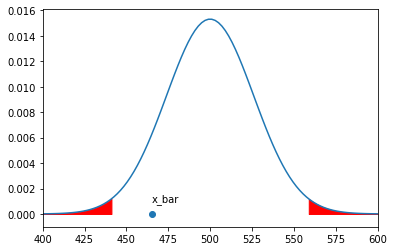

In [23]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 400
x_max = 600


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='red')


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='red')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0010))


# In this case sample mean falls outside the rejection region
# i.e. Fail to reject the Null Hypothesis

In [24]:
# Conclusion using t test

if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [25]:
# Conclusion using p test

p_value = 2 * (1.0 - norm.cdf(np.abs(t)))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.18296295910059968
Fail to reject Null Hypothesis


<b>Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client?</b>

Step - 1:  
Alternate Hypothesis (Bold claim): $$ H_1: \ ? $$
Null Hypothesis (Status Quo): $$ H_0: \ ? $$

Step - 2:  
* Collect a sample of size n = 20 $$  [4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5] $$
* Compute sample mean $$ \bar{x} \ = \ ? $$

Step - 3:
Compute Test Statistic: $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}}$$

Step - 4:
Decide $ \alpha $ or significance level

Step - 5.1: ? tailed t-test: $$ reject \ H_0 \ if \ ? $$

Step - 5.2: Compute p-value

In [26]:
arr1=[4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5]
mean1=sum(arr1)/len(arr1)
print(mean1)
std1=np.std(arr1)
print(std1)

4.25
0.82915619758885


In [27]:
# Defining the sample and population parameters

sample_size = 20
sample_mean = 4.25
pop_mean = 4
sample_std = 0.83

In [30]:
# One Tail - Calculating the t-critical value

confidence_level = 0.95

alpha = 1 - confidence_level

t_critical = t.ppf(1 - alpha,df=19)

print(t_critical)

1.729132811521367


In [31]:
# Calculating the t-score

t = t_score(sample_size, sample_mean, pop_mean, sample_std)

print(t)

1.347028902108307


Text(4.25, 0.1, 'x_bar')

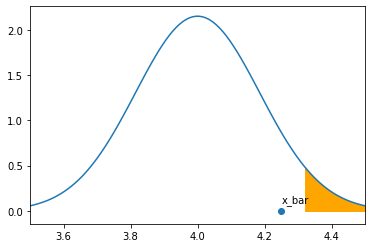

In [32]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 3.5
x_max = 4.5


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / (sample_size**0.5)


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the right critical value (Right tailed Test)
t_critical_right = pop_mean + (t_critical * std)


# Shading the right rejection region
x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

# In this case sample mean falls outside the rejection region
# i.e. Fail to reject the Null Hypothesis

In [33]:
# Conclusion using t test

if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [34]:
p_value = 1.0 - norm.cdf(np.abs(t))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.08898546222463755
Fail to reject Null Hypothesis


<b>Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre?</b>

Step - 1:  
Alternate Hypothesis (Bold Claim): $$ H_1: \ ? $$
Null Hypothesis (Status Quo): $$ H_0: \ ? $$

Step - 2:  
* Collect a sample of size n = 20 $$ [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38] $$
* Compute sample mean $$ \bar{x} \ = \ ? $$

Step - 3:
Compute Test Statistic: $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}}$$

Step - 4:
Decide $ \alpha $

Step - 5.1: ? tailed t-test: $$ reject \ H_0 \ if \ ? $$

Step - 5.2: Compute p-value

In [35]:
arr1=[14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38]
mean1=sum(arr1)/len(arr1)
print(mean1)
std1=np.std(arr1)
print(std1)

15.098999999999998
0.9994043225842081


In [36]:
# Defining the sample and population parameters

sample_size = 20
sample_mean = 15.1
pop_mean = 15
sample_std = 1

In [38]:
# One Tail - Calculating the t-critical value

confidence_level = 0.95

alpha = 1 - confidence_level

t_critical = t.ppf(1 - alpha,df=19)

print(t_critical)

1.729132811521367


In [39]:
# Calculating the t-score

t = t_score(sample_size, sample_mean, pop_mean, sample_std)

print(t)

0.4472135954999564


Text(15.1, 0.1, 'x_bar')

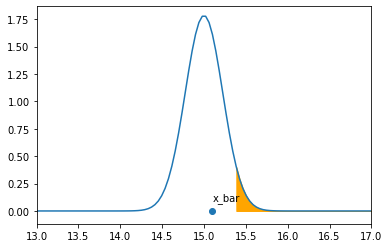

In [40]:
x_min = 13
x_max = 17

mean = pop_mean
std = sample_std / (sample_size**0.5)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)
# plt.ylim(0, 0.03)

plt.plot(x, y)

t_critical_right = pop_mean + (t_critical * std)

x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

# In this case sample mean falls in the acceptance region
# i.e. Fail to Reject the Null Hypothesis

In [41]:
if(t > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [42]:
p_value = 1.0 - norm.cdf(np.abs(t))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.32736042300928914
Fail to reject Null Hypothesis


<b>Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim? 

Step - 1:  
Alternate Hypothesis (Bold Claim): $$ H_1: \ ? $$
Null Hypothesis (Status Quo): $$ H_0: \ ? $$

Step - 2:  
* Collect a sample of size n = 20
* Compute sample mean $$ \bar{x} \ = \ 97.5 $$

Step - 3:
Compute Test Statistic: $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}}$$

Step - 4:
Decide $ \alpha $

Step - 5.1: ? tailed z-test: $$ reject \ H_0 \ if \ ? $$

Step - 5.2: Compute p-value

In [43]:
sample_size=20
sample_mean=97.5
pop_mean = 100
sample_std=6

In [45]:
# One Tail - Calculating the t-critical value

confidence_level = 0.95

alpha = 1 - confidence_level

t_critical = t.ppf(1 - alpha,df=19)

print(t_critical)

1.729132811521367


In [46]:
# Calculating the t-score

t = t_score(sample_size, sample_mean, pop_mean, sample_std)

print(t)

-1.8633899812498247


Text(97.5, 0.0007, 'x_bar')

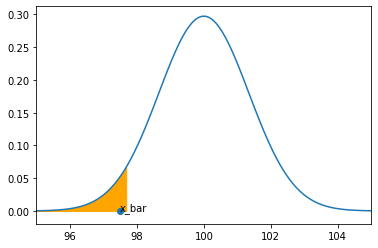

In [47]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 95
x_max = 105

# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / sample_size**0.5

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

# Computing the left critical values (One tailed Test)
t_critical_left = pop_mean + (-t_critical * std)

# Shading the right rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))

# In this case sample mean falls in the rejection region
# i.e. here reject the Null Hypothesis

In [48]:
if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


In [49]:
p_value = 1.0 - norm.cdf(np.abs(t))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.0312037092843529
Reject Null Hypothesis
